In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from IPython.display import display, Image
sns.set()
%matplotlib inline

# Neural Network

**How does an artificial neural network look like**?

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/220px-Neural_network_example.svg.png')

**What can neural networks do?**

Can do both classification and regression. Examples include images classification, self-driving, AlphaGo, Tiktok video recommendation algorithm. 

**Why is the neural network considered as a more advanced method than KNN?**

Neural networks combines many different ideas: linear and nonlinear regression, ensemble methods ((another example is a more advanced type of tree - random forest), etc. The input features often live in a higher-dimensional space. -- at the core of deep learning.

### Perceptrons

- One of the simplest neural network architectures
- Developed by Frank Rosenblatt in 1957.
- Supervised learning method of binary classifiers (output is binary).

See wikipedia page for more information about perceptrons: https://en.wikipedia.org/wiki/Perceptron

In [3]:
Image(url = 'https://upload.wikimedia.org/wikipedia/en/thumb/5/52/Mark_I_perceptron.jpeg/220px-Mark_I_perceptron.jpeg')

**How does a perceptron work?**

Recall the multilinear regression: $ y = b + \Sigma w_i x_i $. 

If $ y \ge 0 $, output 1. Otherwise ($ y \lt 0 $) output 0. Such behavior is called step functions in mathematics.

we rename:

- $b$ : bias
- $w_i$ : weight of feature $x_i$



In [4]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Ncell.png/300px-Ncell.png')

A perceptron is similar to a linear SVM.

**Use perceptron to classify gas and solid in the periodic table**

In [5]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
Elements_sg = Elements.loc[(Elements['Phase'] != 'artificial') & (Elements['Phase'] != 'liq')]
Elements_sg_new = Elements_sg.drop([1])

In [6]:
from sklearn.linear_model import Perceptron

clf = Perceptron()

# do we need class_weight = 'balanced'?

clf.fit(Elements_sg_new[["MeltingPoint", "BoilingPoint"]].values, Elements_sg_new['Phase'])

print("weights:", clf.coef_)
print("bias:", clf.intercept_)

weights: [[1402.169 3595.58 ]]
bias: [-110.]


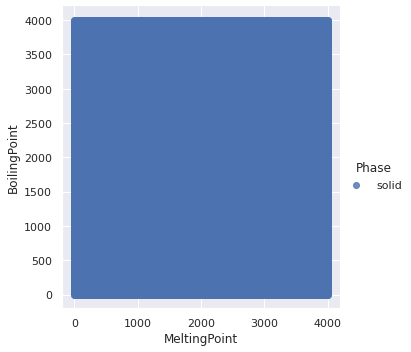

In [7]:
# array of melting point 
x_m = np.linspace(1, 4000, 401)
# array of boiling point
x_b = np.linspace(1, 4000, 401)
# Get 2D mesh of x_m and x_b
xx_1, xx_2 = np.meshgrid(x_m, x_b)
# flatten the 2D array to plot decision boundary
xx = np.concatenate((xx_1.ravel().reshape(-1,1), xx_2.ravel().reshape(-1,1)), axis=1)
# predict
y = clf.predict(xx)
# plot the result
Elements_predict = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
Elements_predict['MeltingPoint'] = Elements_predict['MeltingPoint'].astype(float)
Elements_predict['BoilingPoint'] = Elements_predict['BoilingPoint'].astype(float)
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predict, fit_reg = False);

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(Elements_sg_new[["MeltingPoint", "BoilingPoint"]].values), Elements_sg_new['Phase'])

0.8850574712643678

**Normalization**

Rescaling the data to small values (in general, input values to a neural network should be close to zero -- typically we expect either data with zero-mean and unit-variance, or data in the [0, 1] range. Normalization is necessary for neural network applications. 

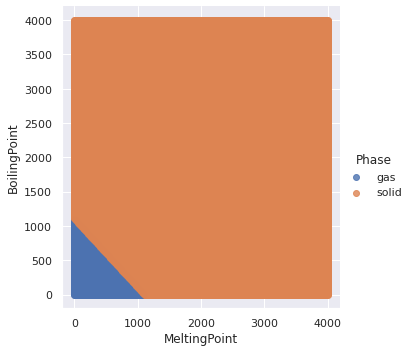

In [9]:
from sklearn.preprocessing import StandardScaler

# do we need class_weight = 'balanced'?

sc = StandardScaler()
sc.fit(Elements_sg_new[["MeltingPoint", "BoilingPoint"]])
X = sc.transform(Elements_sg_new[["MeltingPoint", "BoilingPoint"]])

clf.fit(X, Elements_sg_new['Phase'])

sc.fit(xx)
xx_std = sc.transform(xx)
# predict
y = clf.predict(xx_std)
# plot the result
Elements_predict = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
Elements_predict['MeltingPoint'] = Elements_predict['MeltingPoint'].astype(float)
Elements_predict['BoilingPoint'] = Elements_predict['BoilingPoint'].astype(float)
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predict, fit_reg = False);

**Biological analog**

In [10]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png')

**Limitation**

A single perceptron fails in the XOR problem.


XOR truth table

| Input x1 | Input x2 | Output |
|----------|----------|--------|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|


### Multi-Layer Perceptrons (MLPs) 

Welcome to the real world! Biological analog:

In [11]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/b/be/Forest_of_synthetic_pyramidal_dendrites_grown_using_Cajal%27s_laws_of_neuronal_branching.png')

**Structure of a MLP**

In [12]:
Image(url = 'https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif')

Some terminology:

- MLP belongs to the class of **feedforward neural networks**
- **backpropagation** is a widely used algorithm in training feedforward neural networks: it find out how each connection weight and each bias term should be tweaked in order to reduce the error.

Details of training in handson, summary:

for each training instance the backpropagation algorithm first makes a prediction (forward propagation), measures the error (MSE, cross-entropy, etc.), then goes through each layer in reverse to measure the error contribution from each connection (backward propagation), and finally slightly tweaks the connection weights to reduce the error (using gradient descent for example). These steps are usually automatically taken care of in Keras.

Ref: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

When an artificial neural network contains a deep stack of hidden layers, it is called a **deep neural network**.

### Activation function

Simple perception uses the step function as the activation function, i.e., if $ y \ge 0 $, output 1. Otherwise ($ y \lt 0 $) output 0. This behavior is not smooth and is usually not optimal for using and traning the neural network.

Alternatives:

- The logistic function: $f(y) = \sigma (y) = \frac{1}{1\ –\ e^{-y}}$
- The hyperbolic tangent function: $f(y) = tanh(y) = 2\sigma(2y) – 1$
- The rectified linear unit function: $ f(y) = ReLU(y) = max(0, y) $
- Softmax: $f_i(x) = \frac{e^{x_i}}{\Sigma_{j=1}^n e^{x_j}} $
- ...

Wikipedia has a list of activation functions: https://en.wikipedia.org/wiki/Activation_function. A problem could favor one activition function over another. NN is a very fexible method that different layers can use different activation function.

The nonlinear behaivor of activiation function is the fudemental origin that neural network is a nonlinear method.

# Using Keras

Similar to what we have learned from Sklearn, neural networks don't process raw data, like text files, encoded JPEG image files, or CSV files. They process vectorized & standardized representations.

In Keras:

- Text files need to be read into string tensors, then split into words. Finally, the words need to be indexed & turned into integer tensors.
- Images need to be read and decoded into integer tensors, then converted to floating point and normalized to small values (usually between 0 and 1).
- CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.
- Etc.

Ref: https://keras.io/getting_started/intro_to_keras_for_engineers/

Keras has three backend implementations available:

- TensorFlow (Google).
- Theano (LISA Lab at Université de Montréal).
- Microsoft Cognitive Toolkit (CNTK).

Other open-source frameworks (cannot be used as the backend for Keras):

- PyTorch (Facebook)

**This tutorial uses tensorflow in the bankend of Keras**

### Example: atomization energy predicted from regression MLPs, using number of atoms.

A regression task:

- output: atomization energy
- input: number of atoms of each atomic species

Six input neurons, one output neuron. We do not want to use any activation function for the output neurons, so they are free to output any range of values.

Let's experiment wihth 6 neurons in one hidden layer, activation function of ReLU in the hidden layer, loss function using MSE.


In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Load data**

In [14]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv');

# Train-test splitting
xx_train, xx_validate, y_train, y_validate= train_test_split(qm7b[['n_H', 'n_C', 'n_N', 'n_O', 'n_S', 'n_Cl']].values, qm7b['ae_pbe0'].values, random_state = 290, train_size = 0.8)

# Normalization
scaler = StandardScaler()
sc = sc.fit(xx_train)
xx_train_sc = sc.transform(xx_train)
xx_validate_sc = sc.transform(xx_validate)

**Build the model**

In [15]:
# simplest sequential NN (MLP)
model = keras.models.Sequential()
# construct input layer
model.add(keras.layers.Flatten(input_shape=[6]))
# first hidden layer
model.add(keras.layers.Dense(6, activation='relu'))
# output layer
model.add(keras.layers.Dense(1, activation=None))
# compile the model (include loss function and optimizer)
model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])

2022-10-29 23:33:45.151473: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Notice the number of parameters: NN is a very **flexible** model, but often run into **overfitting**.

Parameters can be found by using _get_weights()_.

In [17]:
# initial parameters
weights, biases = model.layers[1].get_weights()

**Train the model**

In [19]:
history = model.fit(xx_train_sc, y_train, epochs=200, validation_data=(xx_validate_sc, y_validate))

Epoch 1/200
181/181 [==============================] - 0s 1ms/step - loss: 1975.1033 - root_mean_squared_error: 44.4421 - val_loss: 2541.7896 - val_root_mean_squared_error: 50.4162
Epoch 2/200
181/181 [==============================] - 0s 1ms/step - loss: 1941.1761 - root_mean_squared_error: 44.0588 - val_loss: 2500.5095 - val_root_mean_squared_error: 50.0051
Epoch 3/200
181/181 [==============================] - 0s 1ms/step - loss: 1905.1230 - root_mean_squared_error: 43.6477 - val_loss: 2452.6172 - val_root_mean_squared_error: 49.5239
Epoch 4/200
181/181 [==============================] - 0s 1ms/step - loss: 1866.8545 - root_mean_squared_error: 43.2071 - val_loss: 2407.4573 - val_root_mean_squared_error: 49.0658
Epoch 5/200
181/181 [==============================] - 0s 1ms/step - loss: 1831.6168 - root_mean_squared_error: 42.7974 - val_loss: 2361.0425 - val_root_mean_squared_error: 48.5906
Epoch 6/200
181/181 [==============================] - 0s 1ms/step - loss: 1793.9783 - root_mea

**Behaivor of training**

In [20]:
train = pd.DataFrame(history.history)
train.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,1975.103271,44.442135,2541.789551,50.416164
1,1941.176147,44.058781,2500.509521,50.005096
2,1905.123047,43.647717,2452.617188,49.523907
3,1866.854492,43.207111,2407.457275,49.065845
4,1831.616821,42.797394,2361.042480,48.590561


Loss as a function as epochs

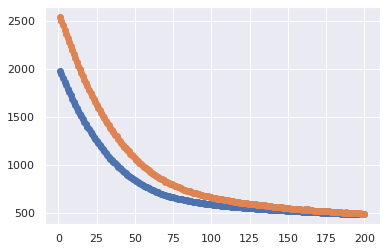

In [21]:
plt.scatter(np.linspace(1, 200, 200), train.loss)
plt.scatter(np.linspace(1, 200, 200), train.val_loss)

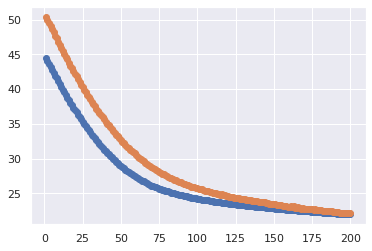

In [22]:
plt.scatter(np.linspace(1, 200, 200), train.root_mean_squared_error)
plt.scatter(np.linspace(1, 200, 200), train.val_root_mean_squared_error)

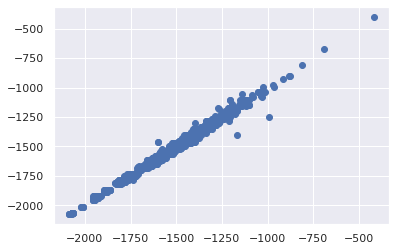

In [23]:
plt.scatter(y_validate, model.predict(xx_validate_sc))

**Make predictions**

In [24]:
model.predict(sc.transform([[7,3,2,0,0,0]]))

array([[-1151.9211]], dtype=float32)

### Useful information for beginners (typical architecture)

**Regreesion MLP**:
    
| Hyperparameter | Typical Value |
|----------------|---------------|
|# input neurons | One per input feature |
|# hidden layers | Depends on the problem. Typically 1 to 5.|
|# neurons per hidden layer | Depends on the problem. Typically 10 to 100.|
|# output neurons | 1 per prediction dimension|
|Hidden activation | ReLU (or SELU) |
|Output activation | None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs) |
|Loss function | MSE or MAE/Huber (if outliers) |

**Classification MLP**:

| Hyperparameter | Binary classification | Multilabel binary classification | Multiclass classification |
|----------------|-----------------------|----------------------------------|---------------------------|
|Input and hidden layers| Same as regression | Same as regression | Same as regression |
|# output neurons | 1 | 1 per label | 1 per class |
|Output layer activation | Logistic | Logistic | Softmax |
|Loss function | Cross-Entropy | Cross-Entropy | Cross-Entropy |

Ref: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow


### The effects of hyperparameters and details of training processes will be disccussed in the handson session.
### A more rigorous approach of model evaluation is based on train-validate-test splitting, which will be used in the handson session.

In [25]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Train-Test-Validation.png/400px-Train-Test-Validation.png')

# Comparing linear regression with neural network

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr3 = linear_model.LinearRegression() 
regr3.fit(xx_train_sc, y_train)
mean_squared_error(y_validate, regr3.predict(xx_validate_sc), squared = False)

18.72615742922323

ANN is very flexible and performs well in many different use cases.

**Why do we favor linear regression (high-bias method) in some cases**?

- When you know the y can be obtained by regression of x.
- Inferences, and interpretation of results. 
- NN often regarded as prediction using a black box: takes long time to train and tune hyperparameters.


A useful video tutorial on Youtube: https://www.youtube.com/playlist?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU